## Project 3: A Neural Network Classifier, Tuned.

### Part 0: Business Case

Possible business case on some professions which requires information about gender segregation. It can be about the customer, which can shows how the market is and should company have more focus about male or female.
Examples: Customer Service in different companies. 

And yes, we just need the proper data preprocessing, then it would be possible to treat the data with models. But we still need centain amount of features to make sure our prediction is usable, so the hardware requirement is also a thing we need to consider. More features will decrease the model speed and could possibly have a better prediction, then less features will of course increase the speed but could possibly give a bad prediction.

## Part 1: Data Exploration & Preparation -- Revisited

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
data = pd.read_csv("voice.csv")

In [4]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


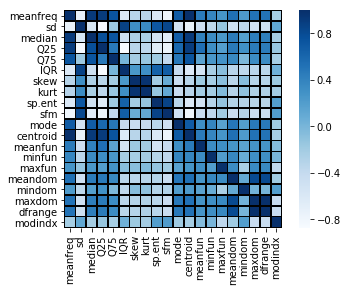

In [17]:
sns.heatmap(data.corr(), linewidths=0.50, vmax=1.0, square=True, cmap="Blues", linecolor='Black')

In [16]:
#NB color only visible when executing inside jupyter notebook not in github 
data.drop(['label'], axis=1).corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.0,-0.72,0.91,0.88,0.71,-0.58,-0.13,-0.21,-0.66,-0.82,0.68,1.0,0.5,0.48,0.46,0.56,0.35,0.57,0.56,-0.28
sd,-0.72,1.0,-0.54,-0.83,-0.13,0.85,-0.069,0.029,0.77,0.87,-0.42,-0.72,-0.49,-0.41,-0.23,-0.48,-0.45,-0.5,-0.49,0.18
median,0.91,-0.54,1.0,0.73,0.72,-0.42,-0.14,-0.22,-0.55,-0.68,0.71,0.91,0.45,0.42,0.43,0.47,0.29,0.47,0.46,-0.25
Q25,0.88,-0.83,0.73,1.0,0.4,-0.86,0.098,0.0031,-0.73,-0.79,0.51,0.88,0.65,0.37,0.32,0.46,0.39,0.48,0.47,-0.18
Q75,0.71,-0.13,0.72,0.4,1.0,0.066,-0.33,-0.36,-0.2,-0.38,0.57,0.71,0.15,0.34,0.44,0.37,0.088,0.34,0.34,-0.23
IQR,-0.58,0.85,-0.42,-0.86,0.066,1.0,-0.28,-0.19,0.69,0.67,-0.28,-0.58,-0.56,-0.23,-0.11,-0.3,-0.41,-0.34,-0.33,0.058
skew,-0.13,-0.069,-0.14,0.098,-0.33,-0.28,1.0,0.98,-0.4,-0.11,-0.31,-0.13,0.12,-0.2,-0.21,-0.3,0.026,-0.25,-0.26,0.04
kurt,-0.21,0.029,-0.22,0.0031,-0.36,-0.19,0.98,1.0,-0.28,-0.0058,-0.38,-0.21,0.046,-0.26,-0.24,-0.35,-0.026,-0.31,-0.31,0.078
sp.ent,-0.66,0.77,-0.55,-0.73,-0.2,0.69,-0.4,-0.28,1.0,0.89,-0.33,-0.66,-0.5,-0.35,-0.21,-0.3,-0.36,-0.34,-0.33,0.29
sfm,-0.82,0.87,-0.68,-0.79,-0.38,0.67,-0.11,-0.0058,0.89,1.0,-0.46,-0.82,-0.46,-0.43,-0.31,-0.45,-0.38,-0.48,-0.47,0.28


### Do we see correlations in feature space? & If any: are they true/justifiable correlations (or anti-correlations)?

Correlation is the statistical relationship between two variables and there are 3 types:
1. Positive Correlation: both variables change in the same direction. (true correlation)
2. Neutral Correlation: No linear relationship in the change of the variables.
3. Negative Correlation: variables change in opposite directions. (anti correlation)

The range of values for the correlation is from -1.0 to 1.0, and the values cannot exceed 1.0 or be less than -1.0. A correlation of -1.0 indicates a perfect negative correlation, and a correlation of 1.0 indicates a perfect positive correlation. Value 0 indicates a perfect neutral correlation, which means there is no linear relationship between these two variables, and it is possible that these variables have a strong curvilinear relationship.

Helping by heatmap and pandas dataframe, we can clearly see all correlations between all features. We can find all three types of correlation in this dataset.

### If so, should -- or could -- we remove/discard features from our work with the NN and kNN models?

As we mentioned above, neutral correlation is when value equal to 0. When value is close to 0, that means there is a weak linear relationship between variables or maybe no linear relationship. <br/>
By look at all values and compare them, we assume that *skew* and *kurt* are the features could possibly remove/discard from the dataset, because the values of correlation between these two features and the rest features are almost all clost to 0, which means they have weak linear relationship between them and the rest features.<br/>
There are still some features that we can remove because their weak linear relationships, such as sd, IQR, sp.ent, sfm and modindx, but they still have decent values of correlation. So remove them may decrease the accuracy of our model, but we can train both them i.e., with these 5 features and without these 5 features, to see which one have the highest accuracy.

### Are there scaling issues w.r.t. feature ratios (fx a=[-.03,0.74], b=[-20000.,9999.])?

Yes, *skew* and *kurt* are way bigger the rest features. If we do not want to remove them from the dataset, we can use MinMaxScaler or StandardScaler from sklearn to scaling the dataset and have a more reliable result. Or we can just remove them and train the rest features, since they are almost not relate to the rest features.

### Highly skewed distributions (mean, standard deviation, skewness, kurtosis ...)?

As we mentioned above, features such as sd, skew, kurt, IQR, sp.ent, sfm and modindx are less relate to the rest of features and meanfreq seems to have decent values of correlation. But it does not mean that we could remove all of them, we only assume to remove *skew* and *kurt* since they are almost not relate to the rest features. 

## Part 2: Model construction

### Part 2.1: k-Nearest Neighbours

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

x_data = data.iloc[:,:-1]
y_data = data['label']

scaler = StandardScaler()
X_data = scaler.fit_transform(x_data)

label = LabelEncoder()
Y_data = label.fit_transform(y_data)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

KNN parameters: <br/>
1. n_neighbours = 3: from the last assignment and proivde the best results.<br/>
2. weights = uniform: All points in each neighborhood are weighted equally. We choose the default value because we can not see anything in this dataset which will make data points weighted different<br/>
3. algorithm = auto: We use the default value - auto algorithm which let model itself to choose the best algorithm.<br/>
4. leaf_size: since the dataset are not big and the improvement of speed does not necessary, so we use the default value<br/>
5. p: we use the default value p, which is p's value for euclidean_distance. <br/>
6. metric = Euclidean: since p is 2, we are using euclidean metric. <br/>
7. n_jobs = None: we keep the default value, since we dont know how much processors we need to run the model<br/>

In [54]:
Knn = KNeighborsClassifier(n_neighbors=3, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="euclidean", n_jobs=None)

### Part 2.2: Keras Neural Networks

In [38]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

Code up a network similar to the lecture note, we create a 3 layer neural network: <br/>
1. input layer: we use ReLU as the activation function, since we do not have any negative values in the dataset. <br/>
2. dropout layer: we decide to implement dropout rate as 0.2, which means during training process, dropout layer will randomly drops 0.2 of the neuron connecetions to prevent model overfitting. <br/>
3. output layer: we use softmax as the activation function, which means it turns scores aka logits into probabilities. It is frequently used in classifications and  push one result closer to 1 while another closer to 0 <br/>

In [58]:
model = models.Sequential([layers.Dense(20, activation='relu', input_shape=(20,)),
                           layers.Dropout(0.2),
                           layers.Dense(2, activation='softmax')])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 42        
Total params: 462
Trainable params: 462
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Part 3: Model Training and Validation, Hyperparameter Grid Search

### KNN Model

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 80/20 splitting
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [70]:
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)
print('Score:', accuracy_score(y_test, y_pred))

Score: 0.9810725552050473


### Neural Network

In [73]:
model.fit(x_train, y_train, epochs = 200)

Epoch 1/200
2534/2534 [==============================] - 0s 50us/step - loss: 0.0165 - acc: 0.9933
Epoch 2/200
2534/2534 [==============================] - 0s 40us/step - loss: 0.0212 - acc: 0.9909
Epoch 3/200
2534/2534 [==============================] - 0s 51us/step - loss: 0.0200 - acc: 0.9933
Epoch 4/200
2534/2534 [==============================] - 0s 44us/step - loss: 0.0165 - acc: 0.9929
Epoch 5/200
2534/2534 [==============================] - 0s 36us/step - loss: 0.0166 - acc: 0.9941
Epoch 6/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0139 - acc: 0.9941
Epoch 7/200
2534/2534 [==============================] - 0s 38us/step - loss: 0.0169 - acc: 0.9937
Epoch 8/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.0168 - acc: 0.9957
Epoch 9/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0172 - acc: 0.9921
Epoch 10/200
2534/2534 [==============================] - 0s 56us/step - loss: 0.0202 - acc: 0.9913
Epoch 11/

2534/2534 [==============================] - 0s 50us/step - loss: 0.0169 - acc: 0.9953
Epoch 84/200
2534/2534 [==============================] - 0s 42us/step - loss: 0.0161 - acc: 0.9933
Epoch 85/200
2534/2534 [==============================] - 0s 46us/step - loss: 0.0145 - acc: 0.9949
Epoch 86/200
2534/2534 [==============================] - 0s 37us/step - loss: 0.0126 - acc: 0.9949
Epoch 87/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.0202 - acc: 0.9929
Epoch 88/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.0120 - acc: 0.9953
Epoch 89/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.0184 - acc: 0.9921
Epoch 90/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.0120 - acc: 0.9957
Epoch 91/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.0159 - acc: 0.9941
Epoch 92/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.0142 - acc: 0.9933
Epoch 93/200


2534/2534 [==============================] - 0s 34us/step - loss: 0.0192 - acc: 0.9929
Epoch 165/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.0118 - acc: 0.9957
Epoch 166/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.0151 - acc: 0.9949
Epoch 167/200
2534/2534 [==============================] - 0s 38us/step - loss: 0.0099 - acc: 0.9961
Epoch 168/200
2534/2534 [==============================] - 0s 37us/step - loss: 0.0133 - acc: 0.9937
Epoch 169/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.0150 - acc: 0.9949
Epoch 170/200
2534/2534 [==============================] - 0s 36us/step - loss: 0.0149 - acc: 0.9945
Epoch 171/200
2534/2534 [==============================] - 0s 46us/step - loss: 0.0148 - acc: 0.9945
Epoch 172/200
2534/2534 [==============================] - 0s 38us/step - loss: 0.0163 - acc: 0.9913
Epoch 173/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.0140 - acc: 0.9933
Epoc

In [74]:
model.evaluate(x_test, y_test)

634/634 [==============================] - 0s 16us/step


[0.07636070045148984, 0.987381702341868]

Accuracy for both models are petty good because we already scaling the data.

### Experiments

In [76]:
# Curse of dimensionality
data_curse = data.drop(['skew', 'kurt'], axis=1)

In [78]:
xc_data = data_curse.iloc[:,:-1]
yc_data = data_curse['label']

Yc_data = label.fit_transform(yc_data)

In [79]:
xc_train, xc_test, yc_train, yc_test = train_test_split(xc_data, Yc_data, test_size=0.2, random_state=42)

In [80]:
# KNN model
# compare to socre with StandardScaler, it is much lower.
Knn.fit(xc_train, yc_train)
yc_pred = Knn.predict(xc_test)
print('Score:', accuracy_score(yc_test, yc_pred))

Score: 0.805993690851735


In [81]:
# Without the StandardScaler
xf_train, xf_test, yf_train, yf_test = train_test_split(x_data, Y_data, test_size=0.2, random_state=42)

In [82]:
# KNN model
# Score is lowest if we do not scale the dataset and keep those unrelate features.
Knn.fit(xf_train, yf_train)
yf_pred = Knn.predict(xf_test)
print('Score:', accuracy_score(yf_test, yf_pred))

Score: 0.7129337539432177


In [83]:
# Train NN model after remove unrelate features
model_curse = models.Sequential([layers.Dense(20, activation='relu', input_shape=(18,)),
                           layers.Dropout(0.2),
                           layers.Dense(2, activation='softmax')])

In [85]:
model_curse.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [86]:
model_curse.fit(xc_train, yc_train, epochs=200)

Epoch 1/200
2534/2534 [==============================] - 0s 165us/step - loss: 0.7102 - acc: 0.5260
Epoch 2/200
2534/2534 [==============================] - 0s 36us/step - loss: 0.6615 - acc: 0.5813
Epoch 3/200
2534/2534 [==============================] - 0s 37us/step - loss: 0.6426 - acc: 0.6310
Epoch 4/200
2534/2534 [==============================] - 0s 37us/step - loss: 0.6239 - acc: 0.6709
Epoch 5/200
2534/2534 [==============================] - 0s 36us/step - loss: 0.6051 - acc: 0.7056
Epoch 6/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.5915 - acc: 0.7111
Epoch 7/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.5776 - acc: 0.7293
Epoch 8/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.5600 - acc: 0.7490
Epoch 9/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.5423 - acc: 0.7561
Epoch 10/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.5313 - acc: 0.7624
Epoch 11

2534/2534 [==============================] - 0s 34us/step - loss: 0.1064 - acc: 0.9649
Epoch 84/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.1077 - acc: 0.9684
Epoch 85/200
2534/2534 [==============================] - 0s 52us/step - loss: 0.1066 - acc: 0.9680
Epoch 86/200
2534/2534 [==============================] - 0s 45us/step - loss: 0.1074 - acc: 0.9665
Epoch 87/200
2534/2534 [==============================] - 0s 46us/step - loss: 0.1145 - acc: 0.9613
Epoch 88/200
2534/2534 [==============================] - 0s 47us/step - loss: 0.1040 - acc: 0.9680
Epoch 89/200
2534/2534 [==============================] - 0s 45us/step - loss: 0.1067 - acc: 0.9676
Epoch 90/200
2534/2534 [==============================] - 0s 46us/step - loss: 0.1121 - acc: 0.9672
Epoch 91/200
2534/2534 [==============================] - 0s 37us/step - loss: 0.1077 - acc: 0.9672
Epoch 92/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.1083 - acc: 0.9641
Epoch 93/200


2534/2534 [==============================] - 0s 48us/step - loss: 0.0816 - acc: 0.9743
Epoch 165/200
2534/2534 [==============================] - 0s 51us/step - loss: 0.0765 - acc: 0.9775
Epoch 166/200
2534/2534 [==============================] - 0s 43us/step - loss: 0.0893 - acc: 0.9712
Epoch 167/200
2534/2534 [==============================] - 0s 38us/step - loss: 0.0863 - acc: 0.9728
Epoch 168/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.0912 - acc: 0.9732
Epoch 169/200
2534/2534 [==============================] - 0s 49us/step - loss: 0.0834 - acc: 0.9755
Epoch 170/200
2534/2534 [==============================] - 0s 54us/step - loss: 0.0824 - acc: 0.9740
Epoch 171/200
2534/2534 [==============================] - 0s 37us/step - loss: 0.0815 - acc: 0.9751
Epoch 172/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.0840 - acc: 0.9712
Epoch 173/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.0825 - acc: 0.9755
Epoc

In [87]:
# Same as KNN model, compare to socre with StandardScaler, it is lower.
model_curse.evaluate(xc_test, yc_test)

634/634 [==============================] - 0s 168us/step


[0.05990686108966355, 0.9826498422712934]

In [88]:
# Train NN model without the StandardScaler and with all features
model_full = models.Sequential([layers.Dense(20, activation='relu', input_shape=(20,)),
                           layers.Dropout(0.2),
                           layers.Dense(2, activation='softmax')])

In [89]:
model_full.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [90]:
model_full.fit(xf_train, yf_train, epochs=200)

Epoch 1/200
2534/2534 [==============================] - 0s 177us/step - loss: 1.1904 - acc: 0.5079
Epoch 2/200
2534/2534 [==============================] - 0s 45us/step - loss: 1.1726 - acc: 0.5422
Epoch 3/200
2534/2534 [==============================] - 0s 35us/step - loss: 1.0915 - acc: 0.5568
Epoch 4/200
2534/2534 [==============================] - 0s 37us/step - loss: 1.0463 - acc: 0.5651
Epoch 5/200
2534/2534 [==============================] - 0s 42us/step - loss: 1.0896 - acc: 0.5781
Epoch 6/200
2534/2534 [==============================] - 0s 39us/step - loss: 0.9766 - acc: 0.5979
Epoch 7/200
2534/2534 [==============================] - 0s 36us/step - loss: 0.9734 - acc: 0.6298
Epoch 8/200
2534/2534 [==============================] - 0s 34us/step - loss: 0.9167 - acc: 0.6456
Epoch 9/200
2534/2534 [==============================] - 0s 35us/step - loss: 0.9328 - acc: 0.6531
Epoch 10/200
2534/2534 [==============================] - 0s 36us/step - loss: 0.9149 - acc: 0.6606
Epoch 11

2534/2534 [==============================] - 0s 32us/step - loss: 0.3230 - acc: 0.8583
Epoch 84/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.3165 - acc: 0.8623
Epoch 85/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.3221 - acc: 0.8556
Epoch 86/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.3147 - acc: 0.8591
Epoch 87/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.3155 - acc: 0.8603
Epoch 88/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.2952 - acc: 0.8682
Epoch 89/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.2950 - acc: 0.8678
Epoch 90/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.3009 - acc: 0.8733
Epoch 91/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.2935 - acc: 0.8721
Epoch 92/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.2961 - acc: 0.8698
Epoch 93/200


2534/2534 [==============================] - 0s 31us/step - loss: 0.1969 - acc: 0.9195
Epoch 165/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.1936 - acc: 0.9136
Epoch 166/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.1933 - acc: 0.9187
Epoch 167/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.2029 - acc: 0.9148
Epoch 168/200
2534/2534 [==============================] - 0s 30us/step - loss: 0.1925 - acc: 0.9238
Epoch 169/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.1925 - acc: 0.9230
Epoch 170/200
2534/2534 [==============================] - 0s 31us/step - loss: 0.1856 - acc: 0.9286
Epoch 171/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.1960 - acc: 0.9211
Epoch 172/200
2534/2534 [==============================] - 0s 33us/step - loss: 0.1854 - acc: 0.9238
Epoch 173/200
2534/2534 [==============================] - 0s 32us/step - loss: 0.1904 - acc: 0.9258
Epoc

In [91]:
# Score is lowest if we do not scale the dataset and keep those unrelate features.
model_full.evaluate(xf_test, yf_test)

634/634 [==============================] - 0s 197us/step


[0.1142454746205724, 0.9652996834144232]